In [2]:
# 1. Import delle librerie fondamentali
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Impostazioni grafiche (opzionale, ma rende i grafici più belli)
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)

# 3. Caricamento del dataset
file_path = 'dataset/all_players.csv' # <-- MODIFICA QUI SE NECESSARIO
df = pd.read_csv(file_path)

print("Dataset caricato con successo!")
print(f"Il dataset è composto da {df.shape[0]} giocatori e {df.shape[1]} attributi.")

Dataset caricato con successo!
Il dataset è composto da 17737 giocatori e 58 attributi.


In [3]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Rank,Name,OVR,PAC,SHO,PAS,DRI,DEF,...,Nation,League,Team,play style,url,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
0,0,0,1,Kylian Mbappé,91,97,90,80,92,36,...,France,LALIGA EA SPORTS,Real Madrid,"Quick Step+, Acrobatic, Finesse Shot, Flair, R...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
1,1,1,2,Rodri,91,66,80,86,84,87,...,Spain,Premier League,Manchester City,"Tiki Taka+, Aerial, Bruiser, Long Ball Pass, P...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
2,2,2,4,Erling Haaland,91,88,92,70,81,45,...,Norway,Premier League,Manchester City,"Acrobatic+, Bruiser, Power Header, Power Shot,...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
3,3,3,5,Jude Bellingham,90,80,87,83,88,78,...,England,LALIGA EA SPORTS,Real Madrid,"Relentless+, Flair, Intercept, Slide Tackle, T...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
4,4,4,7,Vini Jr.,90,95,84,81,91,29,...,Brazil,LALIGA EA SPORTS,Real Madrid,"Quick Step+, Chip Shot, Finesse Shot, First To...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17737 entries, 0 to 17736
Data columns (total 58 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0.1           17737 non-null  int64  
 1   Unnamed: 0             17737 non-null  int64  
 2   Rank                   17737 non-null  int64  
 3   Name                   17737 non-null  object 
 4   OVR                    17737 non-null  int64  
 5   PAC                    17737 non-null  int64  
 6   SHO                    17737 non-null  int64  
 7   PAS                    17737 non-null  int64  
 8   DRI                    17737 non-null  int64  
 9   DEF                    17737 non-null  int64  
 10  PHY                    17737 non-null  int64  
 11  Acceleration           17737 non-null  int64  
 12  Sprint Speed           17737 non-null  int64  
 13  Positioning            17737 non-null  int64  
 14  Finishing              17737 non-null  int64  
 15  Sh

### Pulizia 

In [5]:
# --- FASE DI PULIZIA DEI DATI ---

# 1. Rimuoviamo le colonne indice inutili
df_pulito = df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])

# 2. Gestiamo i dati mancanti nelle statistiche da portiere
# Per un giocatore di movimento, le stats da portiere sono essenzialmente 0 (o un valore molto basso).
# Sostituiamo i valori NaN con un numero, ad esempio 0.
colonne_portiere = ['GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes']
df_pulito[colonne_portiere] = df_pulito[colonne_portiere].fillna(0)

# 3. (Esempio) Pulizia di una colonna di testo per renderla numerica
# Dobbiamo controllare se colonne come Altezza e Peso sono 'object'. Se lo sono, questo è il modo per pulirle.
# Esempio per l'altezza (adatta il nome della colonna se necessario, es. 'Height')
# if 'Height' in df_pulito.columns and df_pulito['Height'].dtype == 'object':
#     df_pulito['Height'] = df_pulito['Height'].str.replace('cm', '').astype(int)

# --- VERIFICA FINALE ---
print("Verifica dopo la pulizia:")
df_pulito.info()

Verifica dopo la pulizia:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17737 entries, 0 to 17736
Data columns (total 56 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rank                   17737 non-null  int64  
 1   Name                   17737 non-null  object 
 2   OVR                    17737 non-null  int64  
 3   PAC                    17737 non-null  int64  
 4   SHO                    17737 non-null  int64  
 5   PAS                    17737 non-null  int64  
 6   DRI                    17737 non-null  int64  
 7   DEF                    17737 non-null  int64  
 8   PHY                    17737 non-null  int64  
 9   Acceleration           17737 non-null  int64  
 10  Sprint Speed           17737 non-null  int64  
 11  Positioning            17737 non-null  int64  
 12  Finishing              17737 non-null  int64  
 13  Shot Power             17737 non-null  int64  
 14  Long Shots             17737

In [6]:
df_pulito.head()

,Rank,Name,OVR,PAC,SHO,PAS,DRI,DEF,PHY,Acceleration,...,Nation,League,Team,play style,url,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
0,1,Kylian Mbappé,91,97,90,80,92,36,78,97,...,France,LALIGA EA SPORTS,Real Madrid,"Quick Step+, Acrobatic, Finesse Shot, Flair, R...",https://www.ea.com/games/ea-sports-fc/ratings/...,0.0,0.0,0.0,0.0,0.0
1,2,Rodri,91,66,80,86,84,87,85,65,...,Spain,Premier League,Manchester City,"Tiki Taka+, Aerial, Bruiser, Long Ball Pass, P...",https://www.ea.com/games/ea-sports-fc/ratings/...,0.0,0.0,0.0,0.0,0.0
2,4,Erling Haaland,91,88,92,70,81,45,88,80,...,Norway,Premier League,Manchester City,"Acrobatic+, Bruiser, Power Header, Power Shot,...",https://www.ea.com/games/ea-sports-fc/ratings/...,0.0,0.0,0.0,0.0,0.0
3,5,Jude Bellingham,90,80,87,83,88,78,83,81,...,England,LALIGA EA SPORTS,Real Madrid,"Relentless+, Flair, Intercept, Slide Tackle, T...",https://www.ea.com/games/ea-sports-fc/ratings/...,0.0,0.0,0.0,0.0,0.0
4,7,Vini Jr.,90,95,84,81,91,29,69,95,...,Brazil,LALIGA EA SPORTS,Real Madrid,"Quick Step+, Chip Shot, Finesse Shot, First To...",https://www.ea.com/games/ea-sports-fc/ratings/...,0.0,0.0,0.0,0.0,0.0


### Controllo formato di altezza e peso

In [7]:
df_pulito[['Height', 'Weight']].dtypes

Height    object
Weight    object
dtype: object

In [8]:
# --- FASE DI PULIZIA ROBUSTA: Altezza e Peso ---

# 1. Puliamo la colonna 'Height' estraendo solo la parte numerica iniziale
# L'espressione regolare '(\d+)' cattura la prima sequenza di numeri che trova
df_pulito['Height'] = df_pulito['Height'].str.extract('(\d+)').astype(int)

# 2. Facciamo la stessa cosa per la colonna 'Weight'
df_pulito['Weight'] = df_pulito['Weight'].str.extract('(\d+)').astype(int)

# --- VERIFICA FINALE ---
print("Verifica DOPO la pulizia robusta:")
print(f"Tipo di dato Altezza: {df_pulito['Height'].dtype}")
print(f"Tipo di dato Peso: {df_pulito['Weight'].dtype}")

print("\nPrime 5 righe delle colonne pulite:")
print(df_pulito[['Name', 'Height', 'Weight']].head())

Verifica DOPO la pulizia robusta:
Tipo di dato Altezza: int64
Tipo di dato Peso: int64

Prime 5 righe delle colonne pulite:
              Name  Height  Weight
0    Kylian Mbappé     182      75
1            Rodri     191      82
2   Erling Haaland     195      94
3  Jude Bellingham     186      75
4         Vini Jr.     176      73


<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\d'
/var/folders/8_/8bb_stxn1_d2y7lc9vy794980000gn/T/ipykernel_15424/591763393.py:5: SyntaxWarning: invalid escape sequence '\d'
  df_pulito['Height'] = df_pulito['Height'].str.extract('(\d+)').astype(int)
/var/folders/8_/8bb_stxn1_d2y7lc9vy794980000gn/T/ipykernel_15424/591763393.py:8: SyntaxWarning: invalid escape sequence '\d'
  df_pulito['Weight'] = df_pulito['Weight'].str.extract('(\d+)').astype(int)


In [9]:
# --- Analisi delle Statistiche per Ruolo ---

# 1. Selezioniamo solo le colonne numeriche principali che ci interessano
stats_columns = ['OVR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Height', 'Weight']

# 2. Raggruppiamo i giocatori per la loro posizione ('Position') e calcoliamo la media
# Il .round(0).astype(int) serve per arrotondare i risultati e renderli più leggibili
stats_per_ruolo = df_pulito.groupby('Position')[stats_columns].mean().round(0).astype(int)

# 3. Ordiniamo i risultati in base all'Overall medio per vedere i ruoli migliori
stats_per_ruolo = stats_per_ruolo.sort_values(by='OVR', ascending=False)

# 4. Visualizziamo i risultati
print("Statistiche Medie per Ruolo:")
print(stats_per_ruolo.head(10)) # Mostriamo i 10 ruoli con Overall medio più alto

Statistiche Medie per Ruolo:
          OVR  PAC  SHO  PAS  DRI  DEF  PHY  Height  Weight
Position                                                   
CDM        68   62   53   62   64   65   69     180      73
LW         68   78   63   62   70   36   58     176      69
CAM        67   70   62   65   69   44   58     177      70
CB         67   60   37   51   54   67   72     186      78
CM         67   66   59   65   68   59   65     178      71
LM         67   77   61   62   69   41   59     176      70
RB         67   73   46   58   64   62   66     178      72
RM         67   77   61   62   69   42   59     176      70
RW         67   77   63   62   70   37   58     175      69
ST         67   71   66   55   66   32   67     182      76


In [10]:
# --- Analisi delle Statistiche per Ruolo (Solo Top Player con OVR >= 85) ---

# 1. Filtriamo il DataFrame per tenere solo i giocatori con Overall >= 85
df_top_players = df_pulito[df_pulito['OVR'] >= 85].copy()

print(f"Numero di giocatori con Overall >= 85: {df_top_players.shape[0]}")
print("-" * 30)

# 2. Selezioniamo le stesse colonne numeriche di prima
stats_columns = ['OVR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Height', 'Weight']

# 3. Raggruppiamo i top player per la loro posizione e calcoliamo la media
stats_per_ruolo_top = df_top_players.groupby('Position')[stats_columns].mean().round(0).astype(int)

# 4. Ordiniamo i risultati in base all'Overall medio
stats_per_ruolo_top = stats_per_ruolo_top.sort_values(by='OVR', ascending=False)

# 5. Visualizziamo i risultati
print("\nStatistiche Medie per Ruolo (Solo Giocatori Top - OVR >= 85):")
print(stats_per_ruolo_top)

Numero di giocatori con Overall >= 85: 148
------------------------------

Statistiche Medie per Ruolo (Solo Giocatori Top - OVR >= 85):
          OVR  PAC  SHO  PAS  DRI  DEF  PHY  Height  Weight
Position                                                   
CAM        87   78   82   85   87   54   69     176      69
CM         87   75   80   85   87   73   76     176      70
GK         87   85   84   81   87   50   86     188      83
RW         87   87   83   83   88   47   70     172      65
ST         87   82   86   75   84   43   79     177      70
CB         86   73   52   70   70   87   82     184      76
CDM        86   68   71   81   80   83   82     180      75
LB         86   84   70   82   83   81   78     171      63
LM         86   86   77   83   86   54   68     170      62
LW         86   90   79   82   88   40   70     176      69
RB         86   77   64   82   80   82   79     174      71
RM         85   82   80   81   86   47   68     176      67


In [11]:
# --- FASE DI CORREZIONE: Mappatura Statistiche Portieri ---

print("Statistiche MEDIE dei portieri PRIMA della correzione:")
print(df_pulito[df_pulito['Position'] == 'GK'][['PAC', 'SHO', 'PAS', 'DRI']].mean().round(1))
print("-" * 30)

# 1. Creiamo una condizione per selezionare solo le righe dei portieri
is_gk = df_pulito['Position'] == 'GK'

# 2. Per i portieri, sostituiamo i valori delle 6 stats base con le loro stats reali da giocatore di movimento.
# Le colonne come 'Acceleration', 'Finishing', 'Vision', 'Ball Control' contengono i loro veri (e bassi) valori.
# Calcoliamo la media delle sotto-statistiche per ottenere i valori aggregati corretti.

# PAC (Velocità) -> Media di Accelerazione e Velocità Scatto
df_pulito.loc[is_gk, 'PAC'] = df_pulito.loc[is_gk, ['Acceleration', 'Sprint Speed']].mean(axis=1)

# SHO (Tiro) -> Media delle statistiche di tiro
df_pulito.loc[is_gk, 'SHO'] = df_pulito.loc[is_gk, ['Positioning', 'Finishing', 'Shot Power', 'Long Shots', 'Volleys', 'Penalties']].mean(axis=1)

# PAS (Passaggio) -> Media delle statistiche di passaggio
df_pulito.loc[is_gk, 'PAS'] = df_pulito.loc[is_gk, ['Vision', 'Crossing', 'Short Passing', 'Long Passing', 'Curve']].mean(axis=1)

# DRI (Dribbling) -> Media delle statistiche di dribbling
df_pulito.loc[is_gk, 'DRI'] = df_pulito.loc[is_gk, ['Agility', 'Balance', 'Reactions', 'Ball Control', 'Dribbling', 'Composure']].mean(axis=1)

# DEF (Difesa) -> Media delle statistiche di difesa
df_pulito.loc[is_gk, 'DEF'] = df_pulito.loc[is_gk, ['Interceptions', 'Heading Accuracy', 'Standing Tackle', 'Sliding Tackle']].mean(axis=1)

# PHY (Fisico) -> Media delle statistiche fisiche
df_pulito.loc[is_gk, 'PHY'] = df_pulito.loc[is_gk, ['Jumping', 'Stamina', 'Strength', 'Aggression']].mean(axis=1)

# Arrotondiamo i nuovi valori per pulizia
stats_base = ['PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY']
df_pulito[stats_base] = df_pulito[stats_base].round(0).astype(int)


# --- VERIFICA FINALE ---
print("\nStatistiche MEDIE dei portieri DOPO la correzione:")
print(df_pulito[df_pulito['Position'] == 'GK'][['PAC', 'SHO', 'PAS', 'DRI']].mean().round(1))

Statistiche MEDIE dei portieri PRIMA della correzione:
PAC    65.9
SHO    63.9
PAS    63.0
DRI    66.7
dtype: float64
------------------------------

Statistiche MEDIE dei portieri DOPO la correzione:
PAC    35.9
SHO    17.9
PAS    24.9
DRI    34.9
dtype: float64


/var/folders/8_/8bb_stxn1_d2y7lc9vy794980000gn/T/ipykernel_15424/3917720986.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[52.5 54.5 47.  ... 48.5 40.5 39. ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_pulito.loc[is_gk, 'PAC'] = df_pulito.loc[is_gk, ['Acceleration', 'Sprint Speed']].mean(axis=1)
/var/folders/8_/8bb_stxn1_d2y7lc9vy794980000gn/T/ipykernel_15424/3917720986.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[21.83333333 24.5        23.33333333 ... 13.33333333 15.16666667
 17.33333333]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_pulito.loc[is_gk, 'SHO'] = df_pulito.loc[is_gk, ['Positioning', 'Finishing', 'Shot Power', 'Long Shots', 'Volleys', 'Penalties']].mean(axis=1)
/var/folders/8_/8bb_stxn1_d2y7lc9vy79

In [12]:
# --- Rieseguiamo l'analisi per ruolo con i dati corretti ---

# Selezioniamo le colonne che ci interessano
stats_columns = ['OVR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY']

# Raggruppiamo i giocatori per ruolo e calcoliamo la media
stats_per_ruolo_corrette = df_pulito.groupby('Position')[stats_columns].mean().round(0).astype(int)

# Ordiniamo i risultati per Overall
stats_per_ruolo_corrette = stats_per_ruolo_corrette.sort_values(by='OVR', ascending=False)

# Visualizziamo la nuova tabella, ora corretta
print("Statistiche Medie per Ruolo (con dati dei Portieri CORRETTI):")
print(stats_per_ruolo_corrette)

Statistiche Medie per Ruolo (con dati dei Portieri CORRETTI):
          OVR  PAC  SHO  PAS  DRI  DEF  PHY
Position                                   
CDM        68   62   53   62   64   65   69
LW         68   78   63   62   70   36   58
CAM        67   70   62   65   69   44   58
CB         67   60   37   51   54   67   72
CM         67   66   59   65   68   59   65
LM         67   77   61   62   69   41   59
RB         67   73   46   58   64   62   66
RM         67   77   61   62   69   42   59
RW         67   77   63   62   70   37   58
ST         67   71   66   55   66   32   67
LB         66   73   47   59   64   62   65
GK         65   36   18   25   35   14   42


In [13]:
# --- Analisi Specifica: Statistiche dei Portieri ---

# 1. Filtriamo il DataFrame per selezionare solo i giocatori con ruolo 'GK'
df_portieri = df_pulito[df_pulito['Position'] == 'GK'].copy()

# 2. Selezioniamo le colonne di interesse: le statistiche specifiche dei portieri più qualche dato generale
colonne_stats_gk = [
    'Name',
    'OVR',
    'GK Diving',
    'GK Handling',
    'GK Kicking',
    'GK Positioning',
    'GK Reflexes'
]

# 3. Ordiniamo i portieri per Overall per vedere i migliori in cima
df_portieri_stats = df_portieri[colonne_stats_gk].sort_values(by='OVR', ascending=False)

# 4. Visualizziamo la tabella con i 15 migliori portieri
print("Statistiche Specifiche per i 15 Migliori Portieri:")
print(df_portieri_stats.head(15))

Statistiche Specifiche per i 15 Migliori Portieri:
                        Name  OVR  GK Diving  GK Handling  GK Kicking  \
8       Gianluigi Donnarumma   89       90.0         84.0        73.0   
10          Thibaut Courtois   89       85.0         89.0        76.0   
13     Marc-André ter Stegen   89       86.0         85.0        89.0   
9                    Alisson   89       86.0         85.0        85.0   
16176      Christiane Endler   88       87.0         82.0        84.0   
21                   Ederson   88       87.0         82.0        91.0   
23                 Jan Oblak   88       85.0         90.0        78.0   
26              Gregor Kobel   88       87.0         86.0        73.0   
36              Mike Maignan   87       84.0         83.0        85.0   
42         Emiliano Martínez   87       84.0         82.0        83.0   
44               Yann Sommer   87       83.0         84.0        85.0   
16187             Mary Earps   86       83.0         83.0        83.0   


In [14]:
# --- Impostazioni di Visualizzazione Complete ---
# Aggiungiamo l'opzione per le colonne
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', None) # <-- Ecco la soluzione!

# --- Analisi Specifica: Statistiche dei Portieri (Output Completo) ---

# 1. Filtriamo il DataFrame
df_portieri = df_pulito[df_pulito['Position'] == 'GK'].copy()

# 2. Selezioniamo le colonne
colonne_stats_gk = [
    'Name', 'OVR', 'GK Diving', 'GK Handling',
    'GK Kicking', 'GK Positioning', 'GK Reflexes'
]
df_portieri_stats = df_portieri[colonne_stats_gk].sort_values(by='OVR', ascending=False)

# 3. Resettiamo l'indice
df_portieri_pulito = df_portieri_stats.reset_index(drop=True)

# 4. Visualizziamo la tabella completa
print("Statistiche Specifiche per i 15 Migliori Portieri (Output Completo):")
print(df_portieri_pulito.head(15))

Statistiche Specifiche per i 15 Migliori Portieri (Output Completo):
                     Name  OVR  GK Diving  GK Handling  GK Kicking  \
0    Gianluigi Donnarumma   89       90.0         84.0        73.0   
1        Thibaut Courtois   89       85.0         89.0        76.0   
2   Marc-André ter Stegen   89       86.0         85.0        89.0   
3                 Alisson   89       86.0         85.0        85.0   
4       Christiane Endler   88       87.0         82.0        84.0   
5                 Ederson   88       87.0         82.0        91.0   
6               Jan Oblak   88       85.0         90.0        78.0   
7            Gregor Kobel   88       87.0         86.0        73.0   
8            Mike Maignan   87       84.0         83.0        85.0   
9       Emiliano Martínez   87       84.0         82.0        83.0   
10            Yann Sommer   87       83.0         84.0        85.0   
11             Mary Earps   86       83.0         83.0        83.0   
12           Manuel N

### Matrice di correlazione

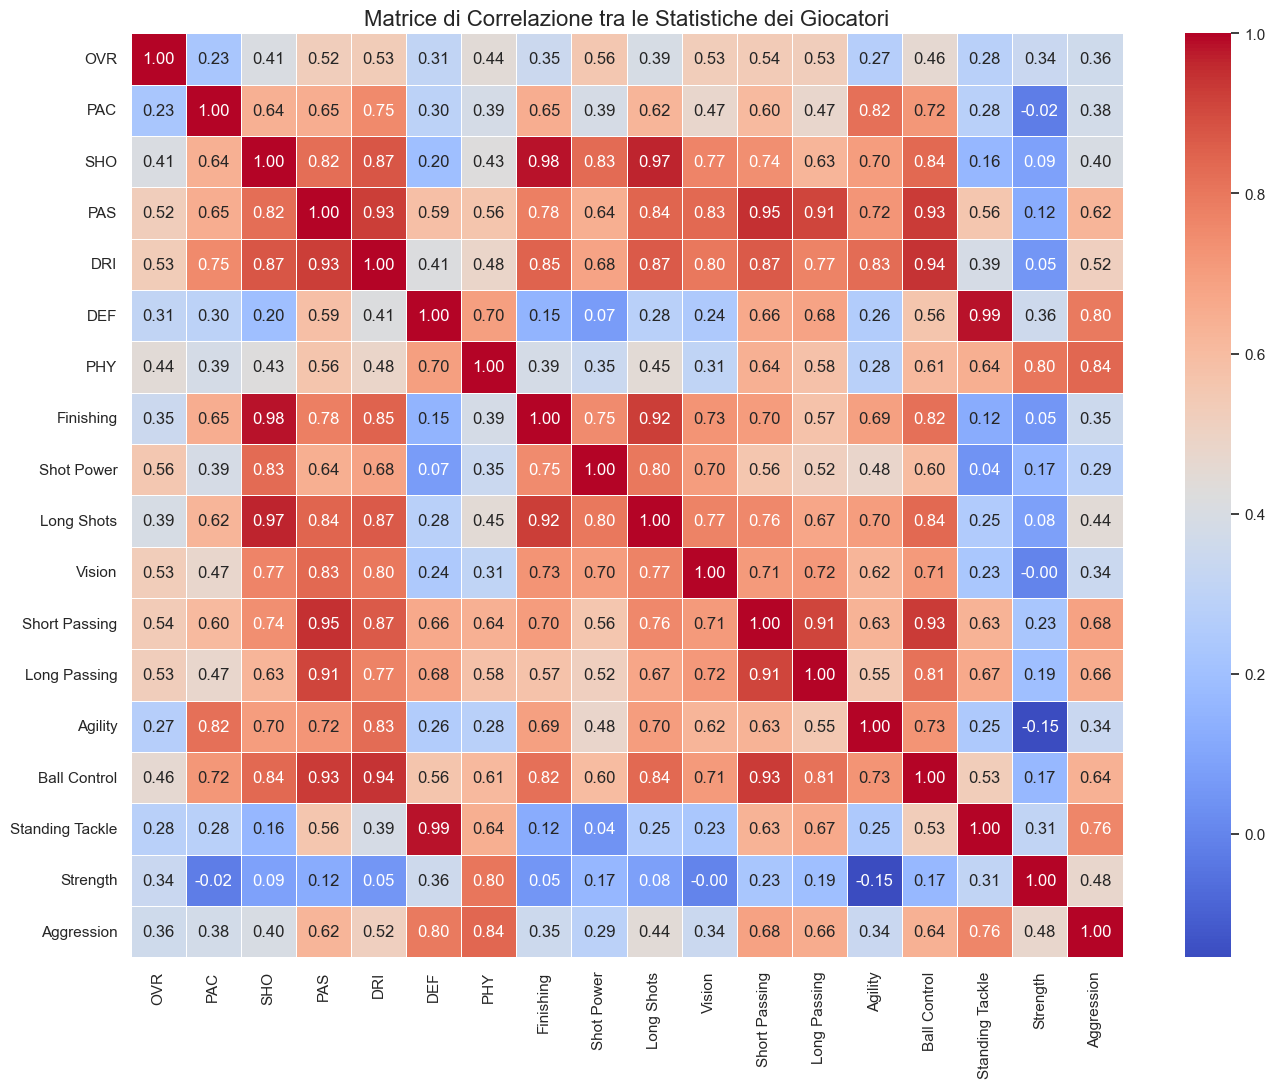

In [15]:
# Selezioniamo solo le colonne numeriche principali per la heatmap
colonne_numeriche = [
    'OVR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY',
    'Finishing', 'Shot Power', 'Long Shots', 'Vision',
    'Short Passing', 'Long Passing', 'Agility', 'Ball Control',
    'Standing Tackle', 'Strength', 'Aggression'
]

# Calcoliamo la matrice di correlazione
correlation_matrix = df_pulito[colonne_numeriche].corr()

# Creiamo la heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matrice di Correlazione tra le Statistiche dei Giocatori', fontsize=16)
plt.show()

### Skill e Piede debole

In [16]:
# Stampiamo di nuovo tutti i nomi delle colonne per trovare quelli giusti
print(df_pulito.columns)

Index(['Rank', 'Name', 'OVR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY',
       'Acceleration', 'Sprint Speed', 'Positioning', 'Finishing',
       'Shot Power', 'Long Shots', 'Volleys', 'Penalties', 'Vision',
       'Crossing', 'Free Kick Accuracy', 'Short Passing', 'Long Passing',
       'Curve', 'Dribbling', 'Agility', 'Balance', 'Reactions', 'Ball Control',
       'Composure', 'Interceptions', 'Heading Accuracy', 'Def Awareness',
       'Standing Tackle', 'Sliding Tackle', 'Jumping', 'Stamina', 'Strength',
       'Aggression', 'Position', 'Weak foot', 'Skill moves', 'Preferred foot',
       'Height', 'Weight', 'Alternative positions', 'Age', 'Nation', 'League',
       'Team', 'play style', 'url', 'GK Diving', 'GK Handling', 'GK Kicking',
       'GK Positioning', 'GK Reflexes'],
      dtype='object')


/var/folders/8_/8bb_stxn1_d2y7lc9vy794980000gn/T/ipykernel_15424/157789658.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0], data=df_pulito, x='Skill moves', palette='viridis')
/var/folders/8_/8bb_stxn1_d2y7lc9vy794980000gn/T/ipykernel_15424/157789658.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[1], data=df_pulito, x='Weak foot', palette='plasma')


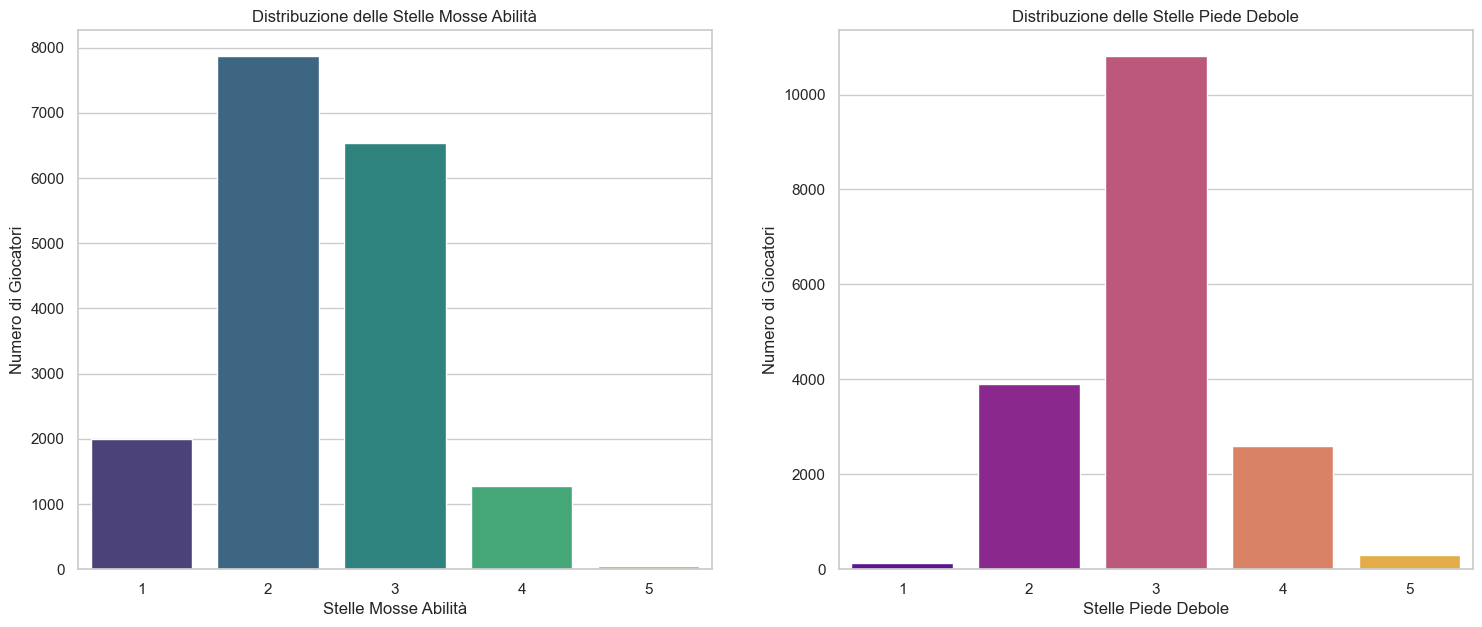

In [17]:
# Creiamo due grafici affiancati
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Grafico per le Mosse Abilità ('Skill Moves')
sns.countplot(ax=axes[0], data=df_pulito, x='Skill moves', palette='viridis')
axes[0].set_title('Distribuzione delle Stelle Mosse Abilità')
axes[0].set_xlabel('Stelle Mosse Abilità')
axes[0].set_ylabel('Numero di Giocatori')

# Grafico per il Piede Debole ('Weak Foot')
sns.countplot(ax=axes[1], data=df_pulito, x='Weak foot', palette='plasma')
axes[1].set_title('Distribuzione delle Stelle Piede Debole')
axes[1].set_xlabel('Stelle Piede Debole')
axes[1].set_ylabel('Numero di Giocatori')

plt.show()

### Migliori giocatori per statistica

In [18]:
# Funzione per trovare e stampare i migliori giocatori per una statistica
def mostra_top_giocatori(statistica, n=5):
    top_list = df_pulito[['Name', 'Position', 'OVR', statistica]].sort_values(by=statistica, ascending=False).head(n)
    print(f"--- Top {n} Giocatori per {statistica} ---")
    print(top_list)
    print("\n")

# Usiamo la funzione per diverse statistiche interessanti
mostra_top_giocatori('Finishing', n=5)
mostra_top_giocatori('Sprint Speed', n=5)
mostra_top_giocatori('Strength', n=5)
mostra_top_giocatori('Vision', n=5)

--- Top 5 Giocatori per Finishing ---
                   Name Position  OVR  Finishing
2        Erling Haaland       ST   91         96
6            Harry Kane       ST   90         95
0         Kylian Mbappé       ST   91         94
11     Lautaro Martínez       ST   89         93
16181       Alex Morgan       ST   87         93


--- Top 5 Giocatori per Sprint Speed ---
                     Name Position  OVR  Sprint Speed
0           Kylian Mbappé       ST   91            97
462         Karim Adeyemi       LM   79            96
16574        Barbra Banda       ST   77            95
1011   Jeremiah St. Juste       CB   77            95
140          Moussa Diaby       RM   83            95


--- Top 5 Giocatori per Strength ---
                    Name Position  OVR  Strength
4192          Daryl Dike       ST   70        95
9645           Kay Tejan       ST   65        95
4727  Aleksandar Vukotić       CB   70        95
1757         Tomáš Chorý       ST   74        95
4354       Pajtim

### Portieri

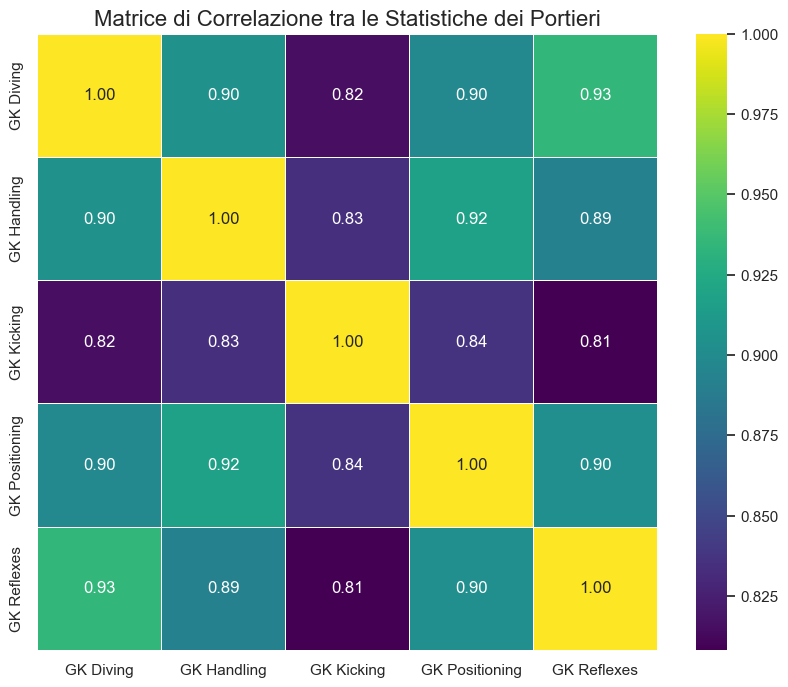

In [19]:
# --- Matrice di Correlazione per le Statistiche da Portiere (Codice Corretto) ---

# 1. Filtriamo di nuovo il DataFrame per i portieri, per sicurezza
df_portieri = df_pulito[df_pulito['Position'] == 'GK'].copy()

# 2. DEFINIAMO ESPLICITAMENTE LE COLONNE NUMERICHE CHE VOGLIAMO CORRELARE
#    Questa lista NON deve contenere 'Name' o altre colonne di testo.
colonne_numeriche_gk = [
    'GK Diving',
    'GK Handling',
    'GK Kicking',
    'GK Positioning',
    'GK Reflexes'
]

# 3. Calcoliamo la matrice di correlazione SOLO su queste colonne
correlation_matrix_gk = df_portieri[colonne_numeriche_gk].corr()

# 4. Creiamo la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_gk, annot=True, cmap='viridis', fmt='.2f', linewidths=.5)
plt.title('Matrice di Correlazione tra le Statistiche dei Portieri', fontsize=16)
plt.show()

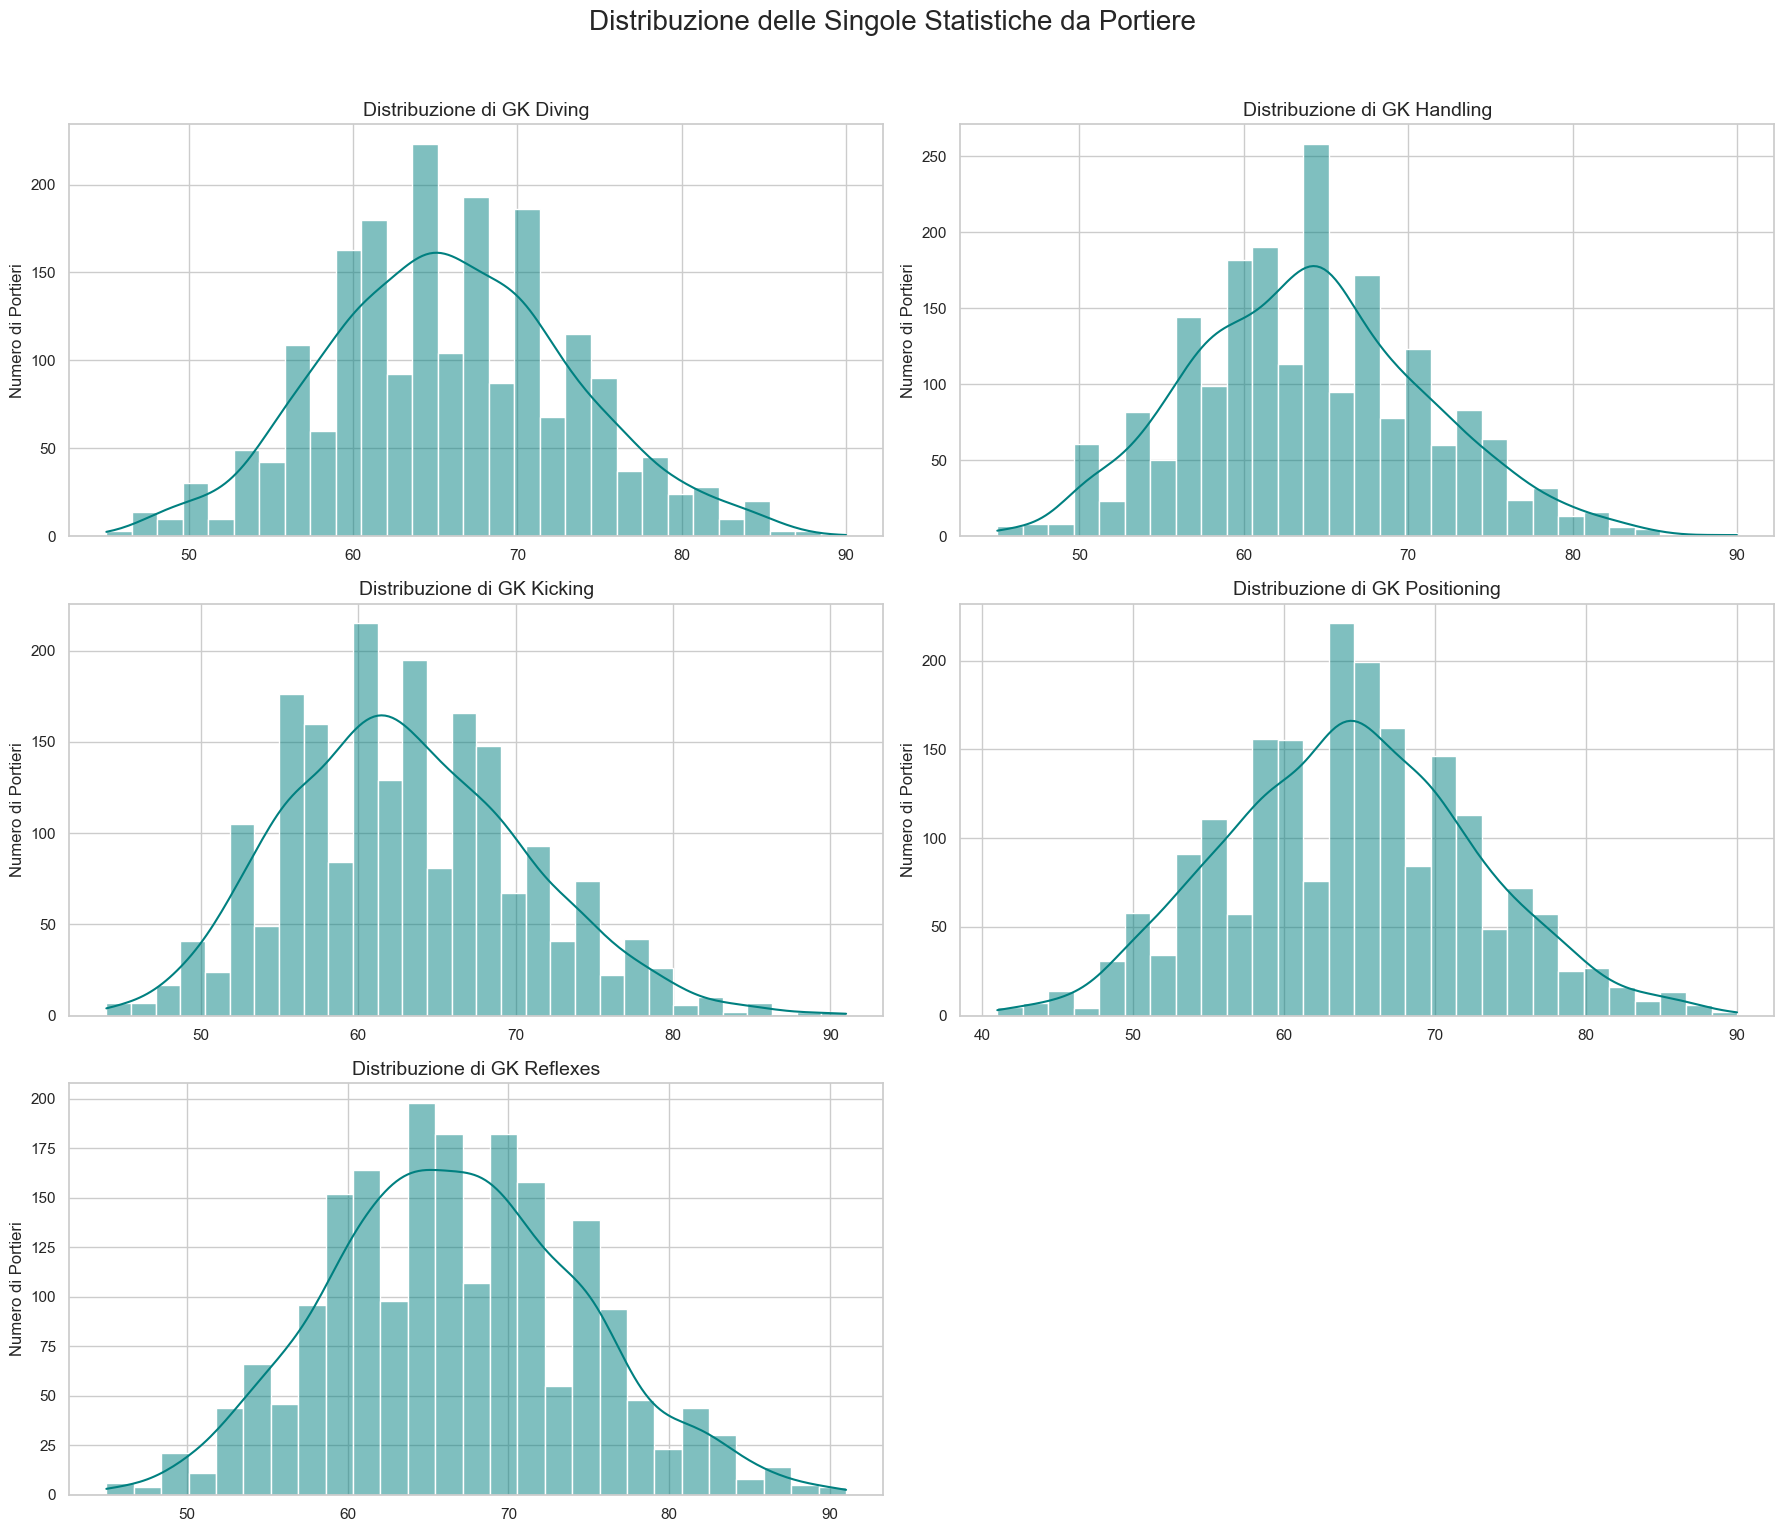

In [20]:
# --- Distribuzione delle Singole Statistiche da Portiere (Codice Corretto) ---

# 1. Filtriamo il DataFrame per i portieri
df_portieri = df_pulito[df_pulito['Position'] == 'GK'].copy()

# 2. DEFINIAMO LA LISTA CORRETTA di colonne, solo numeriche
colonne_numeriche_gk = [
    'GK Diving',
    'GK Handling',
    'GK Kicking',
    'GK Positioning',
    'GK Reflexes'
]

# 3. Creiamo la figura con i grafici
fig, axes = plt.subplots(3, 2, figsize=(18, 15))
axes = axes.flatten() # Trasformiamo la griglia di assi in un array semplice

# 4. Iteriamo sulla lista corretta e creiamo un istogramma per ogni statistica
for i, stat in enumerate(colonne_numeriche_gk):
    sns.histplot(ax=axes[i], data=df_portieri, x=stat, kde=True, color='teal')
    axes[i].set_title(f'Distribuzione di {stat}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Numero di Portieri')

# 5. Rimuoviamo l'ultimo asse che è vuoto
fig.delaxes(axes[-1])

# 6. Aggiungiamo un titolo generale e mostriamo i grafici
plt.suptitle('Distribuzione delle Singole Statistiche da Portiere', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

### Prova Classificazione

passo 1 

In [21]:
# Creiamo una funzione per mappare i ruoli specifici in categorie generali
def get_broad_position(position):
    if position == 'GK':
        return 'Portiere'
    elif position in ['ST', 'CF', 'LW', 'RW']:
        return 'Attaccante'
    elif position in ['CAM', 'CM', 'CDM', 'LM', 'RM']:
        return 'Centrocampista'
    else: # Tutti gli altri (CB, LB, RB, LWB, RWB)
        return 'Difensore'

# Applichiamo la funzione per creare la nostra nuova colonna 'Broad Position'
df_pulito['Broad Position'] = df_pulito['Position'].apply(get_broad_position)

# Verifichiamo il risultato con un conteggio
print("Numero di giocatori per categoria di ruolo:")
print(df_pulito['Broad Position'].value_counts())

Numero di giocatori per categoria di ruolo:
Broad Position
Centrocampista    6606
Difensore         5922
Attaccante        3210
Portiere          1999
Name: count, dtype: int64


passo 2

In [22]:
from sklearn.model_selection import train_test_split

# 1. Definiamo le Features (X) e il Target (y)
# Selezioniamo tutte le colonne numeriche delle statistiche come features
features = df_pulito.select_dtypes(include=['int64', 'float64']).columns.drop('OVR') # Escludiamo l'Overall per rendere la sfida più interessante
X = df_pulito[features]
y = df_pulito['Broad Position']

# 2. Suddividiamo il dataset in Training Set (80%) e Test Set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Dimensioni del Training Set: {X_train.shape}")
print(f"Dimensioni del Test Set: {X_test.shape}")

Dimensioni del Training Set: (14189, 46)
Dimensioni del Test Set: (3548, 46)


passo 3

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Creiamo e addestriamo il modello
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 2. Usiamo il modello addestrato per fare previsioni sul Test Set
y_pred = model.predict(X_test)

# 3. Valutiamo le performance del modello
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuratezza del modello: {accuracy:.2%}\n")

print("Report di Classificazione Dettagliato:")
print(classification_report(y_test, y_pred))

Accuratezza del modello: 89.26%

Report di Classificazione Dettagliato:
                precision    recall  f1-score   support

    Attaccante       0.86      0.76      0.81       642
Centrocampista       0.85      0.87      0.86      1321
     Difensore       0.93      0.95      0.94      1185
      Portiere       1.00      1.00      1.00       400

      accuracy                           0.89      3548
     macro avg       0.91      0.90      0.90      3548
  weighted avg       0.89      0.89      0.89      3548



### Regressione Logistica

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# 1. Standardizzazione delle Features ⚙️
# Creiamo lo scaler e lo "addestriamo" SOLO sui dati di training
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Applichiamo la stessa trasformazione ai dati di test
X_test_scaled = scaler.transform(X_test)


# 2. Creiamo e addestriamo il modello di Regressione Logistica 🧠
# Usiamo i dati standardizzati (X_train_scaled)
# Aumentiamo 'max_iter' per essere sicuri che il modello converga
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train_scaled, y_train)


# 3. Facciamo previsioni sul Test Set (standardizzato) 📈
y_pred_log_reg = log_reg_model.predict(X_test_scaled)


# 4. Valutiamo le performance del nuovo modello 📊
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Accuratezza della Regressione Logistica: {accuracy_log_reg:.2%}\n")

print("Report di Classificazione Dettagliato (Regressione Logistica):")
print(classification_report(y_test, y_pred_log_reg))

Accuratezza della Regressione Logistica: 88.92%

Report di Classificazione Dettagliato (Regressione Logistica):
                precision    recall  f1-score   support

    Attaccante       0.84      0.79      0.81       642
Centrocampista       0.85      0.86      0.85      1321
     Difensore       0.93      0.94      0.93      1185
      Portiere       1.00      1.00      1.00       400

      accuracy                           0.89      3548
     macro avg       0.90      0.90      0.90      3548
  weighted avg       0.89      0.89      0.89      3548



### SVM

In [25]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# 1. Creiamo e addestriamo il modello SVM 🧠
# Useremo i dati già standardizzati (X_train_scaled)
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)


# 2. Facciamo previsioni sul Test Set (standardizzato) 📈
y_pred_svm = svm_model.predict(X_test_scaled)


# 3. Valutiamo le performance del modello SVM 📊
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuratezza del Support Vector Machine (SVM): {accuracy_svm:.2%}\n")

print("Report di Classificazione Dettagliato (SVM):")
print(classification_report(y_test, y_pred_svm))

Accuratezza del Support Vector Machine (SVM): 90.39%

Report di Classificazione Dettagliato (SVM):
                precision    recall  f1-score   support

    Attaccante       0.90      0.75      0.82       642
Centrocampista       0.85      0.90      0.88      1321
     Difensore       0.93      0.96      0.95      1185
      Portiere       1.00      1.00      1.00       400

      accuracy                           0.90      3548
     macro avg       0.92      0.90      0.91      3548
  weighted avg       0.90      0.90      0.90      3548



### Prova clustering

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Selezioniamo SOLO le 6 feature base
features_base = ['PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY']
X_cluster_base = df_pulito[features_base].copy()

# 2. Standardizziamo queste feature
scaler_base = StandardScaler()
X_cluster_base_scaled = scaler_base.fit_transform(X_cluster_base)

print("Dati pronti e standardizzati per il clustering.")
print(f"Forma dei dati standardizzati: {X_cluster_base_scaled.shape}")

Dati pronti e standardizzati per il clustering.
Forma dei dati standardizzati: (17737, 6)


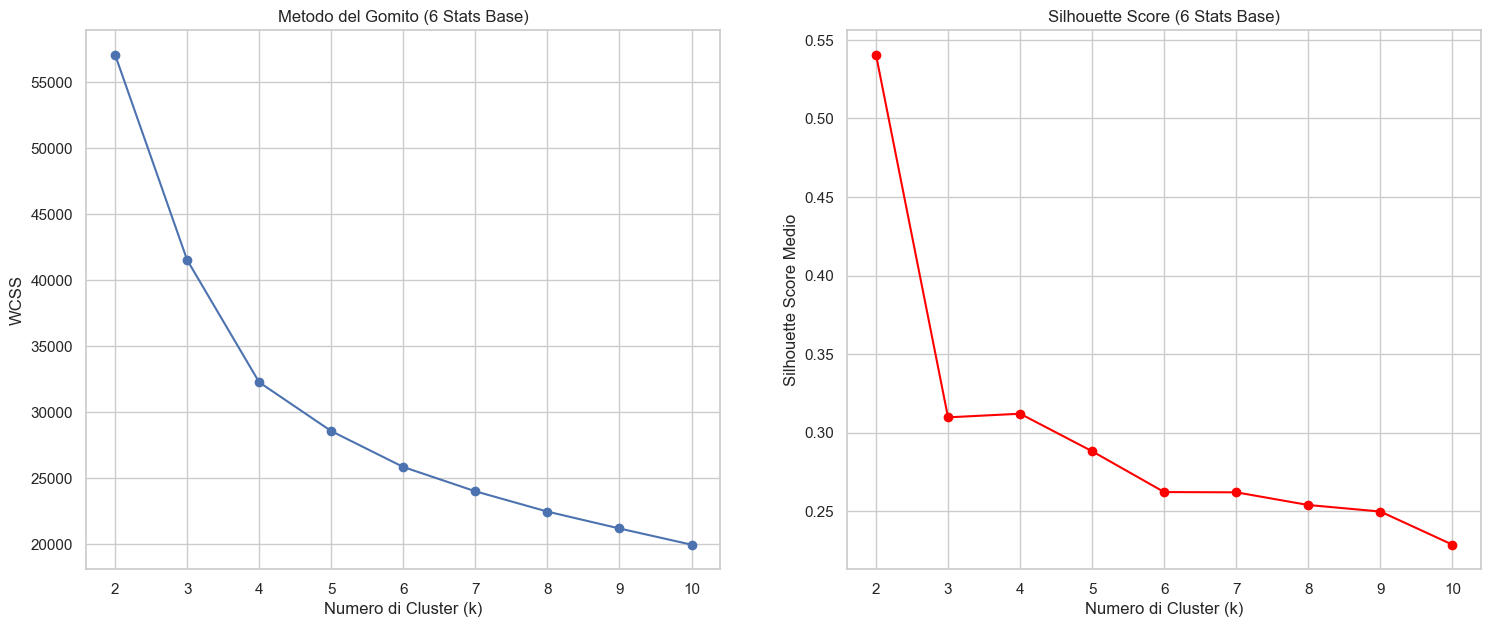

In [38]:
# 3. Determiniamo il k ottimale (rieseguiamo il gomito/silhouette su QUESTI dati)
k_values = range(2, 11)
wcss_base = []
silhouette_scores_base = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_cluster_base_scaled)
    wcss_base.append(kmeans.inertia_)
    # Calcola silhouette solo se ci sono almeno 2 cluster e non tutti i punti sono nello stesso cluster
    if k > 1 and len(set(kmeans.labels_)) > 1:
         silhouette_scores_base.append(silhouette_score(X_cluster_base_scaled, kmeans.labels_))
    else:
         silhouette_scores_base.append(-1) # Valore indicativo per k=1 o cluster unico


# Visualizziamo i grafici per scegliere k
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
axes[0].plot(k_values, wcss_base, marker='o', linestyle='-')
axes[0].set_title('Metodo del Gomito (6 Stats Base)')
axes[0].set_xlabel('Numero di Cluster (k)')
axes[0].set_ylabel('WCSS')
axes[1].plot(k_values, silhouette_scores_base, marker='o', linestyle='-', color='red')
axes[1].set_title('Silhouette Score (6 Stats Base)')
axes[1].set_xlabel('Numero di Cluster (k)')
axes[1].set_ylabel('Silhouette Score Medio')
plt.show()

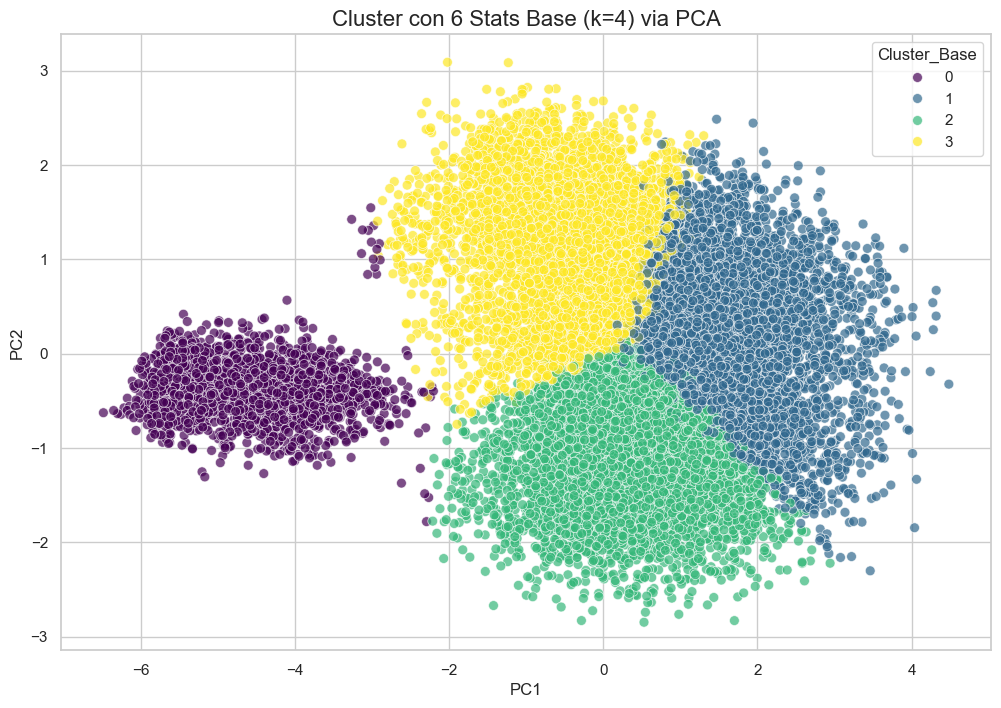


--- Caratteristiche Medie dei 4 Cluster (6 Stats Base) ---
               PAC   SHO   PAS   DRI   DEF   PHY
Cluster_Base                                    
0             36.0  18.0  25.0  34.9  14.1  42.0
1             70.5  61.0  67.0  70.3  62.4  70.4
2             72.9  60.6  57.0  65.7  35.1  58.3
3             61.4  37.0  50.2  54.0  61.9  67.6


In [40]:
# --- Scegli un k basandoti sui grafici e riesegui K-Means ---
# Supponiamo di scegliere k=4 (devi adattarlo!)
NUMERO_CLUSTER_SCELTO_BASE = 4 # <--- ADATTA QUESTO VALORE

kmeans_base = KMeans(n_clusters=NUMERO_CLUSTER_SCELTO_BASE, init='k-means++', random_state=42, n_init=10)
cluster_labels_base = kmeans_base.fit_predict(X_cluster_base_scaled)
df_pulito['Cluster_Base'] = cluster_labels_base # Salviamo in una nuova colonna

# Visualizzazione con PCA
pca_base = PCA(n_components=2)
X_pca_base = pca_base.fit_transform(X_cluster_base_scaled)
df_pca_base = pd.DataFrame(data=X_pca_base, columns=['PC1', 'PC2'])
df_pca_base['Cluster_Base'] = cluster_labels_base

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_pca_base, x='PC1', y='PC2', hue='Cluster_Base', palette='viridis', s=50, alpha=0.7)
plt.title(f'Cluster con 6 Stats Base (k={NUMERO_CLUSTER_SCELTO_BASE}) via PCA', fontsize=16)
plt.show()

# Interpretazione numerica
print(f"\n--- Caratteristiche Medie dei {NUMERO_CLUSTER_SCELTO_BASE} Cluster (6 Stats Base) ---")
print(df_pulito.groupby('Cluster_Base')[features_base].mean().round(1))

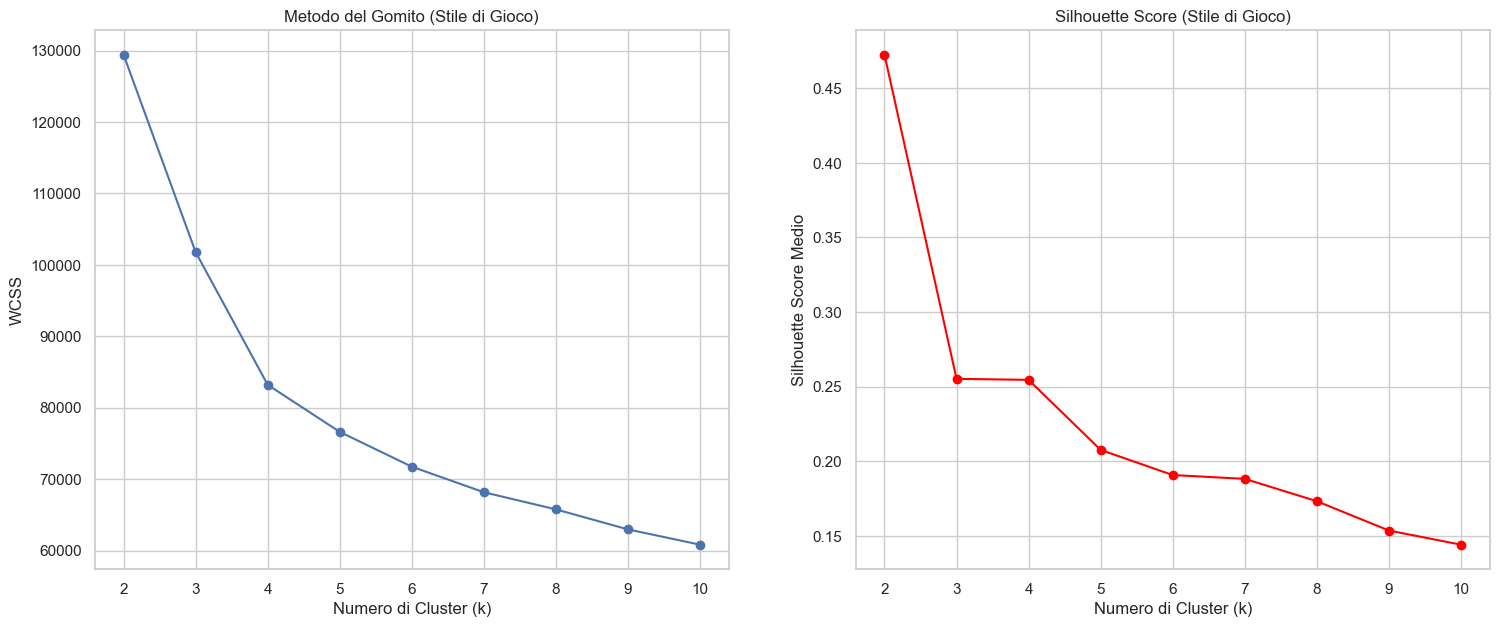

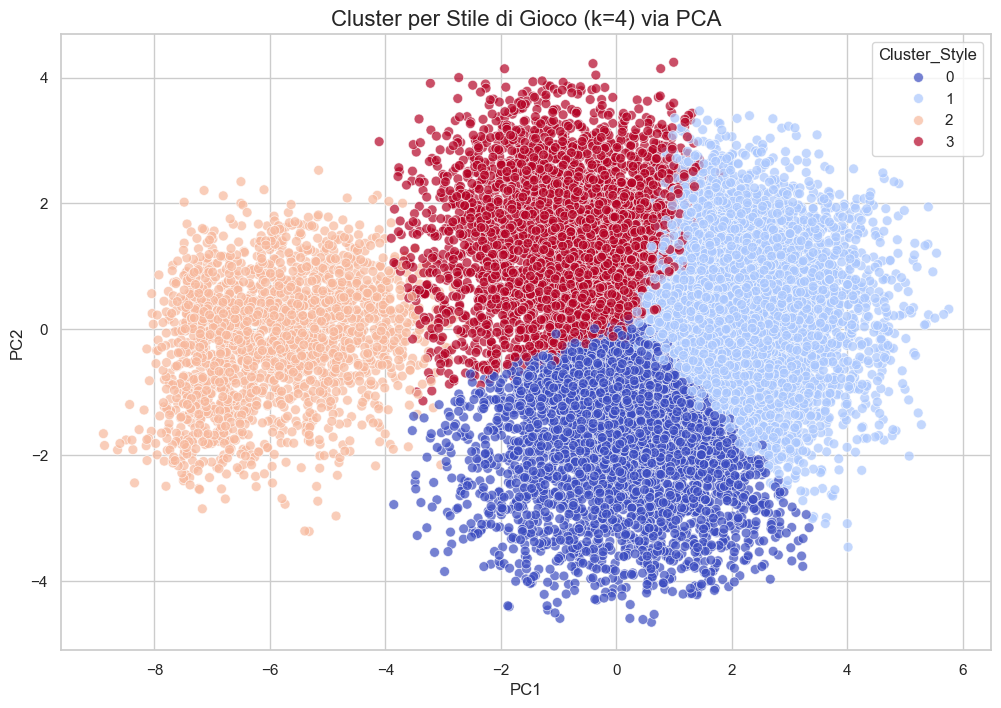


--- Caratteristiche Medie dei 4 Cluster (Stile di Gioco) ---
               Agility  Balance  Ball Control  Dribbling  Short Passing  \
Cluster_Style                                                             
0                 70.5     72.2          62.7       62.8           60.7   
1                 72.3     71.0          71.2       69.7           70.1   
2                 38.1     41.1          19.6       13.5           28.6   
3                 54.5     55.3          57.2       50.2           59.2   

               Vision  Strength  Aggression  Stamina  Jumping  Shot Power  \
Cluster_Style                                                               
0                56.7      52.6        50.2     61.7     55.4        56.1   
1                65.7      69.8        65.1     74.0     73.5        68.5   
2                39.5      59.0        25.4     28.9     55.5        46.9   
3                44.2      74.9        64.0     64.7     72.2        49.7   

               Sprint Sp

In [41]:
# 1. Selezioniamo feature legate alla tecnica/agilità e alla fisicità/potenza
features_style = [
    # Tecnica/Agilità
    'Agility', 'Balance', 'Ball Control', 'Dribbling', 'Short Passing', 'Vision',
    # Fisicità/Potenza
    'Strength', 'Aggression', 'Stamina', 'Jumping', 'Shot Power', 'Sprint Speed'
]
X_cluster_style = df_pulito[features_style].copy()

# 2. Standardizziamo
scaler_style = StandardScaler()
X_cluster_style_scaled = scaler_style.fit_transform(X_cluster_style)

# 3. Determiniamo il k ottimale (rieseguiamo gomito/silhouette)
k_values = range(2, 11)
wcss_style = []
silhouette_scores_style = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_cluster_style_scaled)
    wcss_style.append(kmeans.inertia_)
    if k > 1 and len(set(kmeans.labels_)) > 1:
        silhouette_scores_style.append(silhouette_score(X_cluster_style_scaled, kmeans.labels_))
    else:
        silhouette_scores_style.append(-1)

# Visualizziamo i grafici per scegliere k
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
axes[0].plot(k_values, wcss_style, marker='o', linestyle='-')
axes[0].set_title('Metodo del Gomito (Stile di Gioco)')
axes[0].set_xlabel('Numero di Cluster (k)')
axes[0].set_ylabel('WCSS')
axes[1].plot(k_values, silhouette_scores_style, marker='o', linestyle='-', color='red')
axes[1].set_title('Silhouette Score (Stile di Gioco)')
axes[1].set_xlabel('Numero di Cluster (k)')
axes[1].set_ylabel('Silhouette Score Medio')
plt.show()


# --- Scegli un k e riesegui K-Means ---
# Supponiamo di scegliere k=4
NUMERO_CLUSTER_SCELTO_STYLE = 4 # <--- ADATTA QUESTO VALORE

kmeans_style = KMeans(n_clusters=NUMERO_CLUSTER_SCELTO_STYLE, init='k-means++', random_state=42, n_init=10)
cluster_labels_style = kmeans_style.fit_predict(X_cluster_style_scaled)
df_pulito['Cluster_Style'] = cluster_labels_style

# Visualizzazione con PCA
pca_style = PCA(n_components=2)
X_pca_style = pca_style.fit_transform(X_cluster_style_scaled)
df_pca_style = pd.DataFrame(data=X_pca_style, columns=['PC1', 'PC2'])
df_pca_style['Cluster_Style'] = cluster_labels_style

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_pca_style, x='PC1', y='PC2', hue='Cluster_Style', palette='coolwarm', s=50, alpha=0.7)
plt.title(f'Cluster per Stile di Gioco (k={NUMERO_CLUSTER_SCELTO_STYLE}) via PCA', fontsize=16)
plt.show()

# Interpretazione numerica
print(f"\n--- Caratteristiche Medie dei {NUMERO_CLUSTER_SCELTO_STYLE} Cluster (Stile di Gioco) ---")
print(df_pulito.groupby('Cluster_Style')[features_style].mean().round(1))

Parametri DBSCAN: eps=2.0, min_samples=10
Numero di cluster trovati: 1
Numero di punti rumore (outlier): 1 (0.0%)


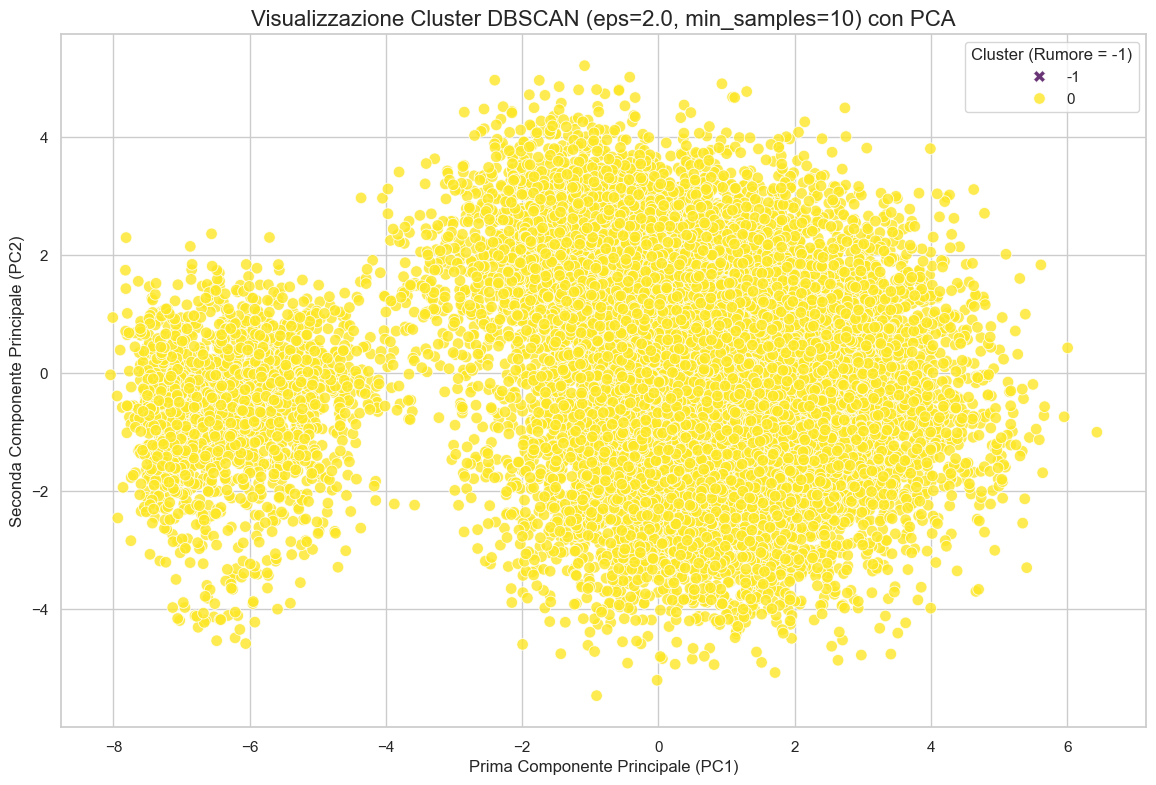

In [43]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assicurati che X_cluster_scaled sia definito correttamente da una cella precedente

# --- Parametri DBSCAN (usa quelli che avevi scelto) ---
EPSILON = 2.0
MIN_SAMPLES = 10

dbscan = DBSCAN(eps=EPSILON, min_samples=MIN_SAMPLES)
cluster_labels_dbscan = dbscan.fit_predict(X_cluster_scaled)

# --- Analisi dei Risultati ---
n_clusters = len(set(cluster_labels_dbscan)) - (1 if -1 in cluster_labels_dbscan else 0)
n_noise = list(cluster_labels_dbscan).count(-1)

print(f"Parametri DBSCAN: eps={EPSILON}, min_samples={MIN_SAMPLES}")
print(f"Numero di cluster trovati: {n_clusters}")
print(f"Numero di punti rumore (outlier): {n_noise} ({n_noise / len(X_cluster_scaled):.1%})")

# --- Visualizzazione con PCA (Codice Corretto) ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster_scaled)

df_pca_dbscan = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca_dbscan['Cluster_DBSCAN'] = cluster_labels_dbscan

# --- Creazione del dizionario markers COMPLETO ---
unique_labels = sorted(list(set(cluster_labels_dbscan)))
markers_dict = {-1: 'X'}  # Marker X per il rumore
# Assegna il marker 'o' (cerchio) a tutti gli altri cluster (da 0 in su)
markers_dict.update({label: 'o' for label in unique_labels if label != -1})

# --- Creiamo lo scatter plot ---
plt.figure(figsize=(14, 9))
sns.scatterplot(
    data=df_pca_dbscan,
    x='PC1',
    y='PC2',
    hue='Cluster_DBSCAN',
    palette='viridis',
    s=70, # Aumentato leggermente per visibilità
    alpha=0.8,
    style='Cluster_DBSCAN',
    markers=markers_dict, # <-- Usiamo il dizionario completo
    hue_order=unique_labels # Usiamo la lista ordinata per la legenda
)

plt.title(f'Visualizzazione Cluster DBSCAN (eps={EPSILON}, min_samples={MIN_SAMPLES}) con PCA', fontsize=16)
plt.xlabel('Prima Componente Principale (PC1)')
plt.ylabel('Seconda Componente Principale (PC2)')
plt.legend(title='Cluster (Rumore = -1)')
plt.grid(True)
plt.show()

# Aggiungiamo le etichette DBSCAN al DataFrame principale se non l'hai già fatto
if 'Cluster_DBSCAN' not in df_pulito.columns:
     df_pulito['Cluster_DBSCAN'] = cluster_labels_dbscan

--- Caratteristiche Medie dei Cluster trovati da DBSCAN ---
                 PAC   SHO   PAS   DRI   DEF   PHY  Height  Weight  Finishing  \
Cluster_DBSCAN                                                                  
0               64.9  49.7  54.9  60.6  48.7  62.9   180.7    74.0       47.4   

                Short Passing  Dribbling  Standing Tackle  Strength  
Cluster_DBSCAN                                                       
0                        60.3       56.9             49.6      65.3  


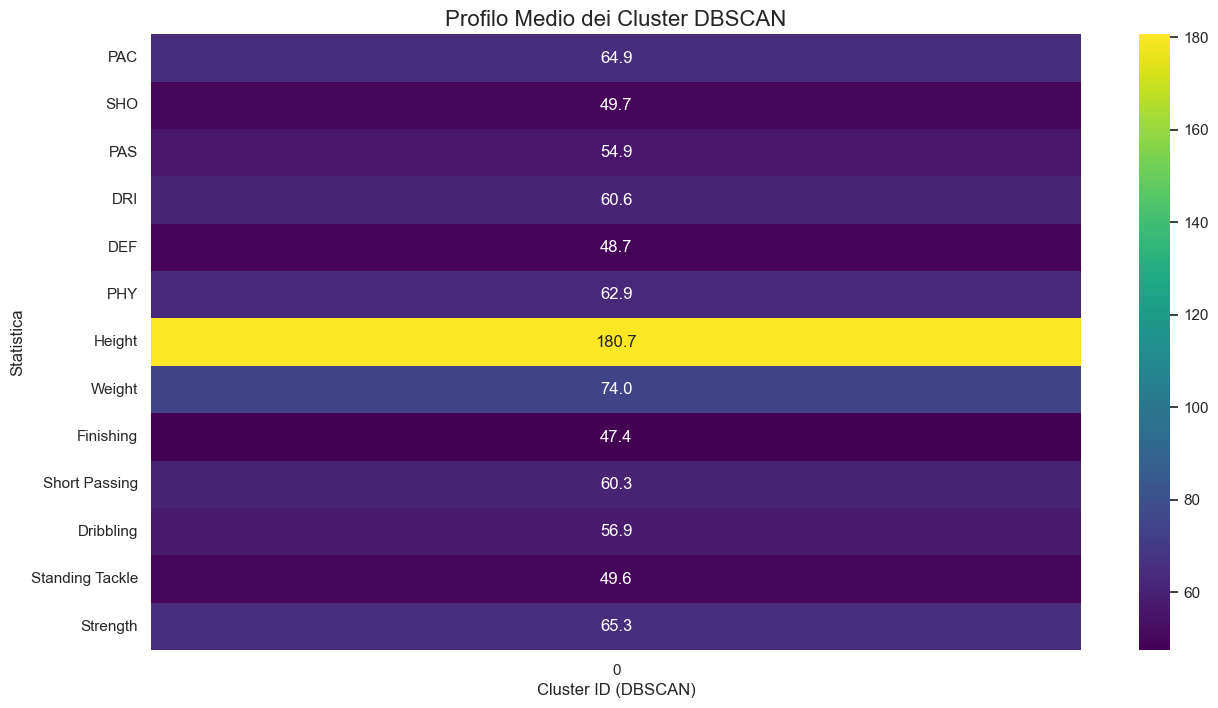


Distribuzione dei giocatori nei cluster DBSCAN:
Cluster_DBSCAN
0    17736
Name: count, dtype: int64


In [44]:
# Assicurati che 'df_pulito' contenga la colonna 'Cluster_DBSCAN' con le etichette
# e che 'features_clustering' sia la lista delle 13 feature usate per DBSCAN

# Escludiamo i punti rumore (-1), anche se in questo caso non ce ne sono
df_clusters_dbscan = df_pulito[df_pulito['Cluster_DBSCAN'] != -1].copy()

# Calcoliamo le statistiche medie per ogni cluster trovato da DBSCAN
centroids_dbscan = df_clusters_dbscan.groupby('Cluster_DBSCAN')[features_clustering].mean().round(1)

print(f"--- Caratteristiche Medie dei Cluster trovati da DBSCAN ---")
print(centroids_dbscan)

# Visualizziamo i centroidi con una heatmap per un confronto più facile
plt.figure(figsize=(15, 8))
sns.heatmap(centroids_dbscan.T, annot=True, cmap='viridis', fmt='.1f')
plt.title('Profilo Medio dei Cluster DBSCAN', fontsize=16)
plt.xlabel('Cluster ID (DBSCAN)')
plt.ylabel('Statistica')
plt.show()

# Confronta la dimensione dei cluster DBSCAN
print("\nDistribuzione dei giocatori nei cluster DBSCAN:")
print(df_clusters_dbscan['Cluster_DBSCAN'].value_counts().sort_index())